In [136]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
data = np.genfromtxt('ex1data1.txt', delimiter=',')
m = data.shape[0]
y = data[:,1]
y = y[:,np.newaxis]  # https://stackoverflow.com/a/33481152

In [79]:
X = np.ones((m, 2))
X[:,1] = data[:,0]
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [38]:
theta = np.zeros((2, 1))
theta

array([[0.],
       [0.]])

In [41]:
iterations = 1500
alpha = 0.01

In [80]:
def compute_cost(X, y, theta):
    m = X.shape[0]
    predictions = np.dot(X, theta)
    sqr_errors = (predictions - y) ** 2
    return (1 / (2 * m)) * np.sum(sqr_errors)

In [81]:
compute_cost(X, y, theta)

32.072733877455676

In [82]:
compute_cost(X, y, np.array([[-1], [2]]))

54.24245508201238

In [111]:
def gradient_descent_step(X, y, theta, alpha):
    m = X.shape[0]
    predictions = np.dot(X, theta)
    term = np.dot(np.transpose(X), (predictions - y))  # https://www.geeksforgeeks.org/vectorization-of-gradient-descent/
    return theta - alpha * (1 / m) * term

In [120]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_function_history = []
    for i in range(iterations):
        theta = gradient_descent_step(X, y, theta, alpha)
        cost_function_history.append(compute_cost(X, y, theta))
    return theta, cost_function_history

In [161]:
final_theta, _ = gradient_descent(X, y, theta, alpha, iterations)
final_theta

array([[-3.63029144],
       [ 1.16636235]])

<AxesSubplot:title={'center':'Plot'}, xlabel='Population', ylabel='Revenue'>

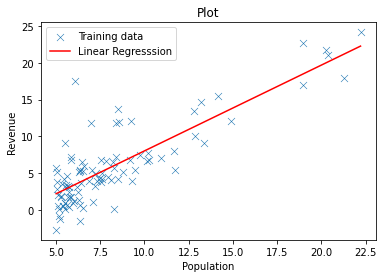

In [162]:
fig, ax = plt.subplots()
ax.set(title='Plot', xlabel='Population', ylabel='Revenue')
sns.scatterplot(x=X[:,1], y=y[:,0], ax=ax, label='Training data', marker='x', s=50)
linear_regression = np.dot(X, final_theta)
sns.lineplot(x=X[:,1], y=linear_regression[:,0], ax=ax, label='Linear Regresssion', color='red')

In [163]:
predict1 = np.dot(np.array([1, 3.5]), final_theta)
print('For population = 35,000, we predict a profit of', predict1)

For population = 35,000, we predict a profit of [0.45197679]


In [164]:
predict2 = np.dot(np.array([1, 7]), final_theta)
print('For population = 70,000, we predict a profit of', predict2)

For population = 70,000, we predict a profit of [4.53424501]
